## 6.1 특징 추출

특징 추출 기법중 하나인 컨볼루션 연산은 각 픽셀을 본레 픽셀과 그 주변 픽셀의 조합으로 대체하는 동작이다. 연산에 쓰이는 작은 행렬을 필터 또는 커널이라 한다.

컨볼류션 연산은 우리말로 합성곱이라고 한다. 원본 이미지의 각 픽셀을 포함한 주변 픽셀과 필터의 모든 픽셀을 각 곱연산을 하고, 그 결과를 모두 합해서 새로운 이미지에 넣어주기 때무에 합성곱이라 한다.

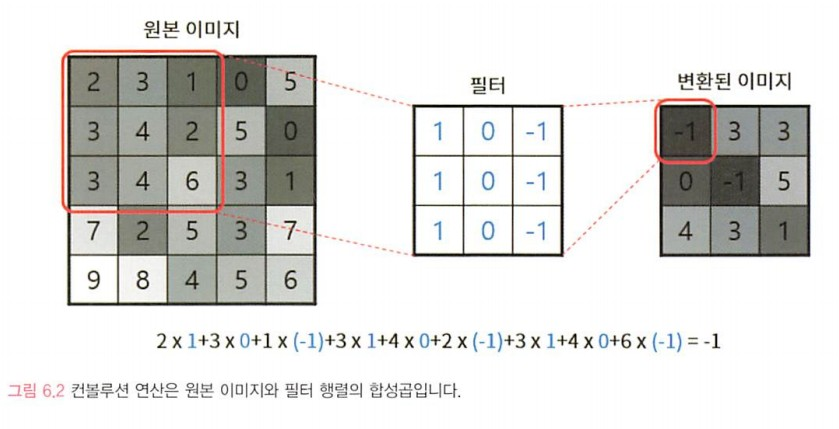

이런 필터들은 경헙적 지식을 통해 직접 손으로 넣어준 결과이다.

적용하ㄱ자 하는 분야에 대한 전문지식이 필요하다. 수작업으로 특징을 설계하는것은 시간과 비용이 많이 든다. 한 분야에서 효과적 특징을 다른분야에 적용하기 어렵다.

## 6.2 주요레이어 정리

Dense레이어는 신경망에서 가장 기본적인 레이러로 완전 연결레이어다. Flatten레이어는 다차원의 이미지를 1차원으로 평평하게 바꿔주는 단순한 레이어이다.

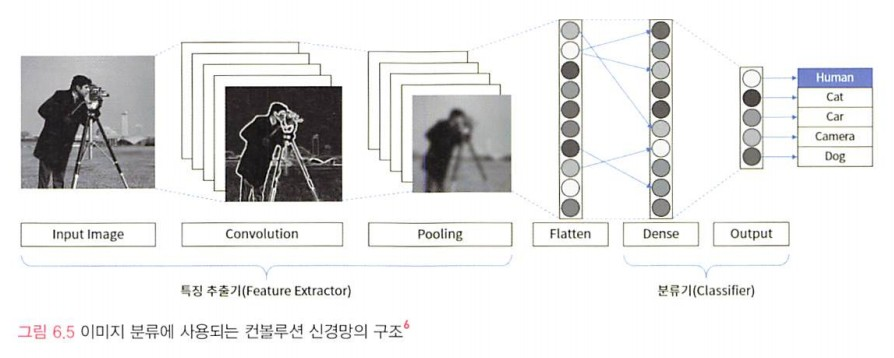

분류를 위한 컨볼루션 신경망은 특징 추출기와 분류기가 합쳐져 있는 형태다. 이 가운데 특징 추출기의 역할을 하는것은 컨볼루션 레이어와 풀링레이어이며 Dense는 분류기 역할을 한다.

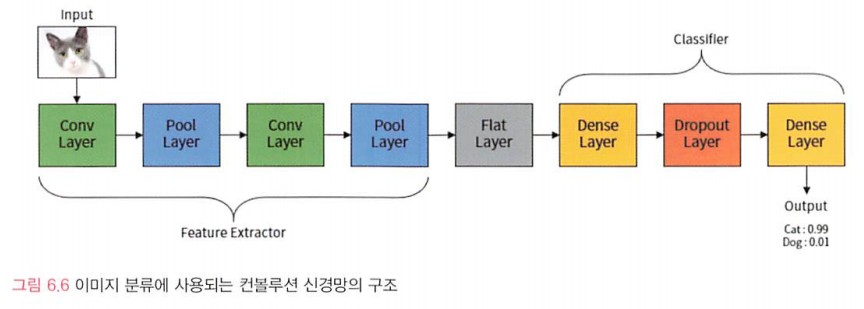

특징 추출기에는 컨볼루션 레이어와 풀링 레이어가 교차되며 배치된다. 분류기에는 Dense 레이어가 배치되며, 과적합을 막기위해 드롭아웃이 Dense사이에 배치된다.

### 6.2.1 컨볼류션 레이어

사용하는 필터는 네트워크 학습을 통해 자동으로 추출된다. 코드에서 지정해야 하는 값은 필터의 개수다.

이미지에는 원색으로 구성된 채널이 있다. 채널이란 각 이미지가 가진 색상에 대한 정보를 분리해서 담아놓는 공간이다.

컨볼루션 레이어는 각 채널에 대해 계산된 값을 합쳐서 새로운 이미지를 만들어낸다. 새로운 이미지의 마지막 차원소는 필터의 수와 동일하다.

여러개의 컨볼류션 레이어를 쌓으면 뒤쪽 레이어로 갈수록 필터의 수를 저점 늘리기 때문에 마지막 차원 수는 점점 많아진다.

2차원 이미지를 다루는 컨볼루션 레이어를 생성하는 코드다.

In [1]:
# 텐서플로 2 버전 선택
try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass
import tensorflow as tf

conv1 = tf.keras.layers.Conv2D(kernel_size=(3,3), strides=(2,2),padding='valid',filters=16)

stride는 필터가 계산 과정에서 한스텝마다 이동하는 크기다. 

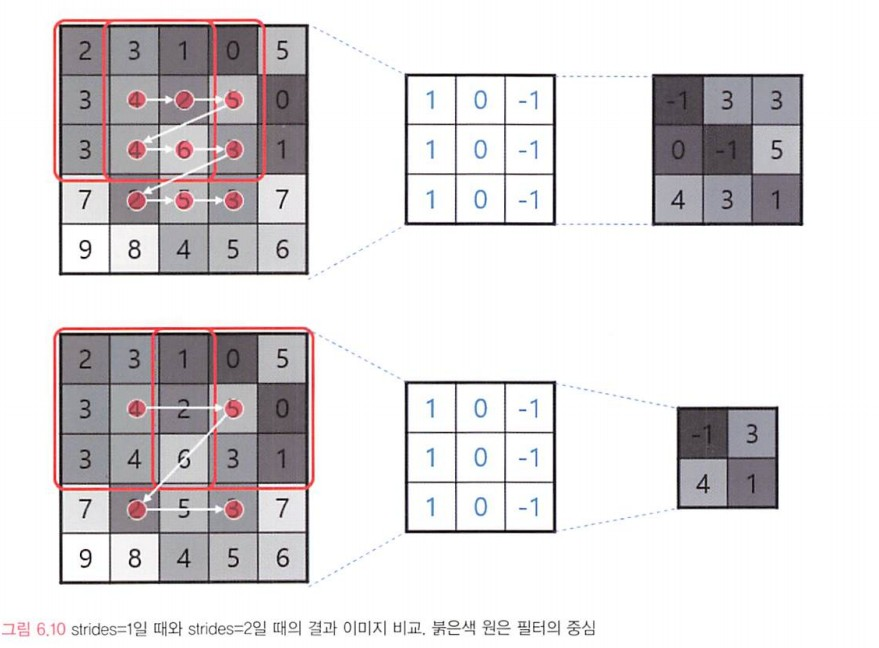

padding은 컨볼루션 연산 전에 입력 이미지주변에 빈 값을 넣을지 지정하는 옵션으로서 'valid'와 'same'이라는 2가지 옵션중 하나를 사용한다. 'same'은 빈 값을 넣어서 출력 이미지의 크기를 입력과 같도록 보존한다. 이때 값을 0으로 넣으면 제로 패딩이 된다.

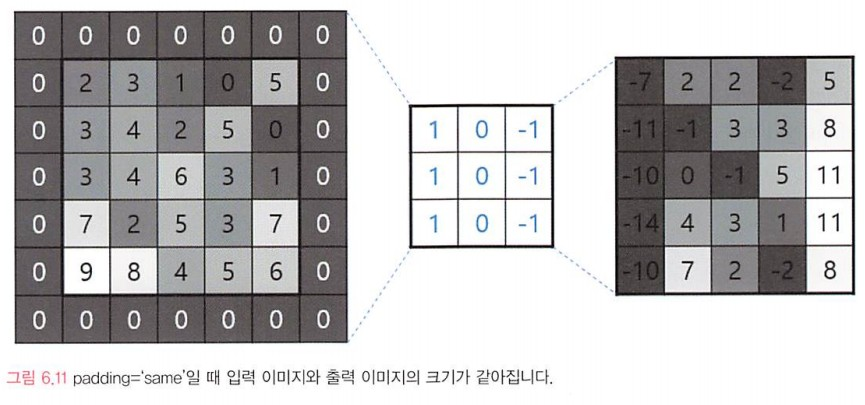

filters가 많을수록 학습 속도가 느려지고 과적합이 발생할수있다. VGG는 필터의 수를 2배씩 늘려간다.

### 6.2.2 풀링레이어

이미지를 구성하는 픽셀 중 인접한 픽셀들은 비슷한 정보를 갖고 있는 경우가 많다. 이미지의 크기를 줄이면서 중요한 정보만 남기기 위해 서프샘플링이라는 기법을 사용한다. 이 과정에서 사용되는 레이어가 폴링 레이어다.

In [2]:
pool1 = tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2))

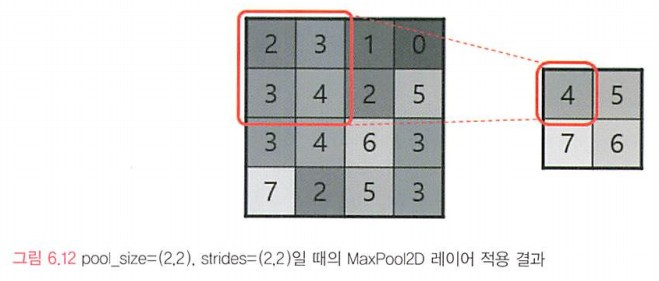

### 6.2.3 드롭아웃 레이어

뉴런의부분집합을 제거하는 것이다. 확률적으로 일부 뉴런에 대한 연결을 끊고, 테스트 할때는 정상저으로 모든 값을 포함해서 계산한다.

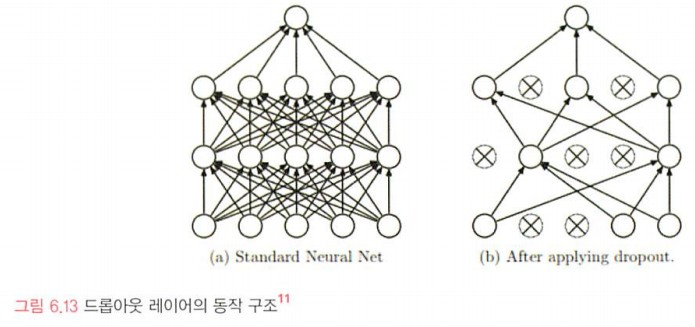

In [3]:
pool1 = tf.keras.layers.Dropout(rate=0.3)

rate는 제외할 뉴런의 비율을 나타낸다.

## 6.3Fashion MNIST 데이터세트에 적용하기

In [4]:
# 6.4 Fashion MNIST 데이터셋 불러오기 및 정규화
import tensorflow as tf

fashion_mnist = tf.keras.datasets.fashion_mnist
(train_X, train_Y), (test_X, test_Y) = fashion_mnist.load_data()

train_X = train_X / 255.0
test_X = test_X / 255.0

4423680/4422102 [==============================] - 0s 0us/step


In [5]:
# 6.5 데이터를 채널을 가진 이미지 형태(3차원)으로 바꾸기
# reshape 이전
print(train_X.shape, test_X.shape)

train_X = train_X.reshape(-1, 28, 28, 1)
test_X = test_X.reshape(-1, 28, 28, 1)

# reshape 이후
print(train_X.shape, test_X.shape)

(60000, 28, 28) (10000, 28, 28)
(60000, 28, 28, 1) (10000, 28, 28, 1)


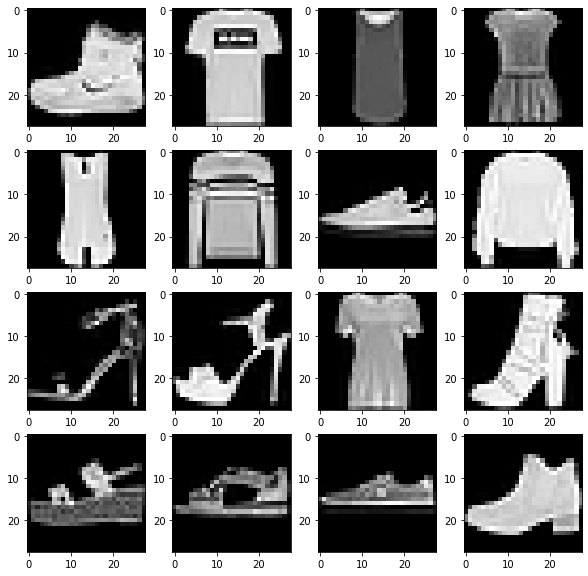

[9 0 0 3 0 2 7 2 5 5 0 9 5 5 7 9]


In [6]:
# 6.6 데이터 확인
import matplotlib.pyplot as plt
# 전체 그래프의 사이즈를 width=10, height=10 으로 지정합니다.
plt.figure(figsize=(10, 10))
for c in range(16):
    # 4행 4열로 지정한 grid 에서 c+1 번째의 칸에 그래프를 그립니다. 1~16 번째 칸을 채우게 됩니다.
    plt.subplot(4,4,c+1)
    plt.imshow(train_X[c].reshape(28,28), cmap='gray')
    
plt.show()

# train 데이터의 첫번째 ~ 16번째 까지의 라벨을 프린트합니다.
print(train_Y[:16])

In [7]:
# 6.7 Fashion MNIST 분류 컨볼루션 신경망 모델 정의
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(input_shape=(28,28,1), kernel_size=(3,3), filters=16),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=32),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=64),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=10, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        4640      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 64)        18496     
_________________________________________________________________
flatten (Flatten)            (None, 30976)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               3965056   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 3,989,642
Trainable params: 3,989,642
Non-trainable params: 0
______________________________________________

Epoch 1/25
1407/1407 [==============================] - 6s 4ms/step - loss: 0.4606 - accuracy: 0.8347 - val_loss: 0.3934 - val_accuracy: 0.8573
Epoch 2/25
1407/1407 [==============================] - 6s 4ms/step - loss: 0.3355 - accuracy: 0.8775 - val_loss: 0.3719 - val_accuracy: 0.8651
Epoch 3/25
1407/1407 [==============================] - 6s 4ms/step - loss: 0.2806 - accuracy: 0.8970 - val_loss: 0.3757 - val_accuracy: 0.8725
Epoch 4/25
1407/1407 [==============================] - 6s 4ms/step - loss: 0.2420 - accuracy: 0.9111 - val_loss: 0.3838 - val_accuracy: 0.8711
Epoch 5/25
1407/1407 [==============================] - 6s 4ms/step - loss: 0.2095 - accuracy: 0.9221 - val_loss: 0.4353 - val_accuracy: 0.8714
Epoch 6/25
1407/1407 [==============================] - 6s 4ms/step - loss: 0.1797 - accuracy: 0.9340 - val_loss: 0.4525 - val_accuracy: 0.8643
Epoch 7/25
1407/1407 [==============================] - 6s 4ms/step - loss: 0.1663 - accuracy: 0.9382 - val_loss: 0.4985 - val_accuracy:

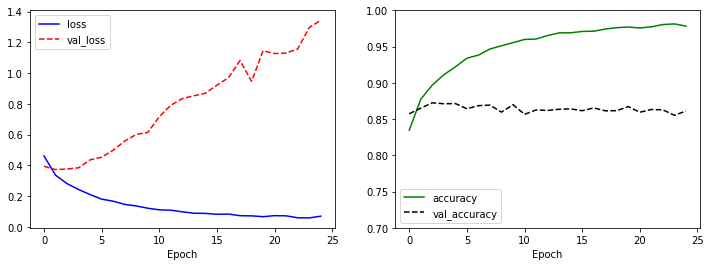

[1.344922423362732, 0.8533999919891357]

In [8]:
# 6.9 Fashion MNIST 분류 컨볼루션 신경망 모델 학습
history = model.fit(train_X, train_Y, epochs=25, validation_split=0.25)

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

model.evaluate(test_X, test_Y, verbose=0)

In [9]:
# 6.10 Fashion MNIST 분류 컨볼루션 신경망 모델 정의 - 풀링 레이어, 드랍아웃 레이어 추가
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(input_shape=(28,28,1), kernel_size=(3,3), filters=32),
    tf.keras.layers.MaxPool2D(strides=(2,2)),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=64),
    tf.keras.layers.MaxPool2D(strides=(2,2)),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=128),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(units=10, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 3, 3, 128)         73856     
_________________________________________________________________
flatten_1 (Flatten)          (None, 1152)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)              

Epoch 1/25
1407/1407 [==============================] - 5s 3ms/step - loss: 0.5171 - accuracy: 0.8129 - val_loss: 0.3556 - val_accuracy: 0.8714
Epoch 2/25
1407/1407 [==============================] - 5s 3ms/step - loss: 0.3605 - accuracy: 0.8694 - val_loss: 0.3308 - val_accuracy: 0.8776
Epoch 3/25
1407/1407 [==============================] - 5s 3ms/step - loss: 0.3182 - accuracy: 0.8843 - val_loss: 0.3227 - val_accuracy: 0.8814
Epoch 4/25
1407/1407 [==============================] - 5s 3ms/step - loss: 0.2890 - accuracy: 0.8946 - val_loss: 0.2984 - val_accuracy: 0.8903
Epoch 5/25
1407/1407 [==============================] - 5s 3ms/step - loss: 0.2708 - accuracy: 0.9001 - val_loss: 0.3015 - val_accuracy: 0.8926
Epoch 6/25
1407/1407 [==============================] - 5s 3ms/step - loss: 0.2528 - accuracy: 0.9074 - val_loss: 0.3139 - val_accuracy: 0.8875
Epoch 7/25
1407/1407 [==============================] - 5s 3ms/step - loss: 0.2370 - accuracy: 0.9131 - val_loss: 0.3300 - val_accuracy:

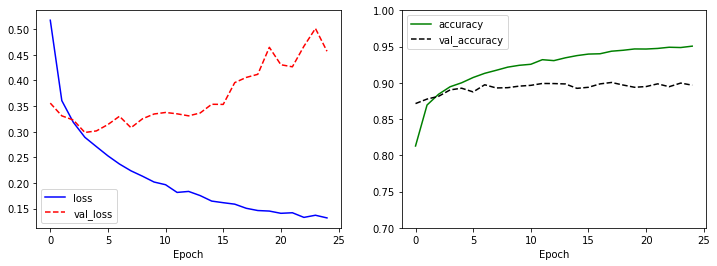

[0.47524863481521606, 0.8870999813079834]

In [10]:
# 6.11 Fashion MNIST 분류 컨볼루션 신경망 모델 학습 - 풀링 레이어, 드랍아웃 레이어 추가
history = model.fit(train_X, train_Y, epochs=25, validation_split=0.25)

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

model.evaluate(test_X, test_Y, verbose=0)

## 6.4 퍼포먼스 높이기

#### 6.4.1 더 많은 레이어 쌓기

In [11]:
# 6.12 VGGNet 스타일의 Fashion MNIST 분류 컨볼루션 신경망 모델 정의
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(input_shape=(28,28,1), kernel_size=(3,3), filters=32, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=64, padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=128, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=256, padding='valid', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=512, activation='relu'),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(units=256, activation='relu'),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(units=10, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 14, 14, 128)       73856     
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 12, 12, 256)       295168    
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 6, 6, 256)        

VGG-19는 특징 추출기의 초반에 컨ㅂㄹ루션 레이어를 2개 겹친뒤 풀링 레이어를 1개 사용하는 패턴을 2차례, 그 후 컨볼루션 레이어를 4개 겹친뒤 풀링 레이어 1개를 사용하는 패턴을 3차례 반복한다.

Epoch 1/25
1407/1407 [==============================] - 8s 6ms/step - loss: 0.5917 - accuracy: 0.7861 - val_loss: 0.3574 - val_accuracy: 0.8739
Epoch 2/25
1407/1407 [==============================] - 8s 6ms/step - loss: 0.3719 - accuracy: 0.8660 - val_loss: 0.2852 - val_accuracy: 0.8910
Epoch 3/25
1407/1407 [==============================] - 8s 6ms/step - loss: 0.3268 - accuracy: 0.8830 - val_loss: 0.2551 - val_accuracy: 0.9047
Epoch 4/25
1407/1407 [==============================] - 8s 6ms/step - loss: 0.3017 - accuracy: 0.8933 - val_loss: 0.2436 - val_accuracy: 0.9084
Epoch 5/25
1407/1407 [==============================] - 8s 6ms/step - loss: 0.2894 - accuracy: 0.8958 - val_loss: 0.2262 - val_accuracy: 0.9167
Epoch 6/25
1407/1407 [==============================] - 8s 6ms/step - loss: 0.2767 - accuracy: 0.9004 - val_loss: 0.2274 - val_accuracy: 0.9140
Epoch 7/25
1407/1407 [==============================] - 8s 6ms/step - loss: 0.2668 - accuracy: 0.9045 - val_loss: 0.2204 - val_accuracy:

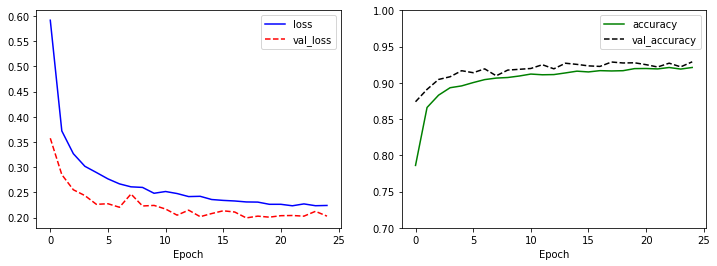

[0.21489204466342926, 0.9254999756813049]

In [12]:
# 6.13 VGGNet 스타일의 Fashion MNIST 분류 컨볼루션 신경망 모델 학습
history = model.fit(train_X, train_Y, epochs=25, validation_split=0.25)

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

model.evaluate(test_X, test_Y, verbose=0)

### 이미지 보강

훈련 데이터에 없는 이미지를 새롭게 만들어내서 훈련 데이터를 보강하는 것이다. 훈련데이터의 이미지를 원본으로 삼고 일정한 변형을 가해서 만든다.

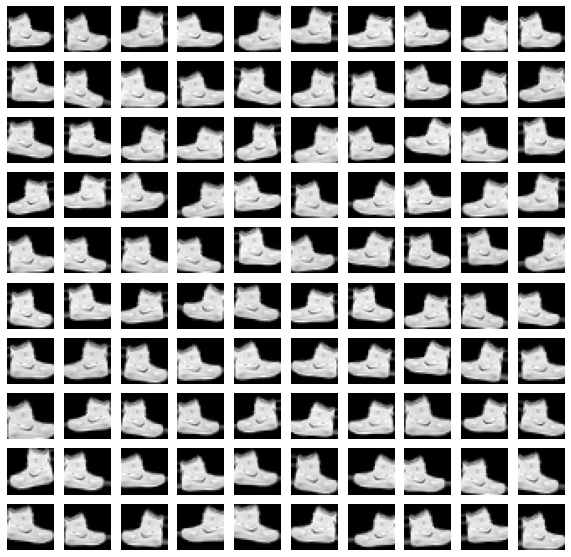

In [13]:
# 6.14 Image Augmentation 데이터 표시
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

# 이 ImageDataGenerator 코드 부분은 다음 링크에서 참조했습니다. 
# https://github.com/franneck94/MNIST-Data-Augmentation/blob/master/mnist.py
# rotation, zoom, shift, flip 등을 지정합니다.
image_generator = ImageDataGenerator(
            rotation_range=10,
            zoom_range=0.10,
            shear_range=0.5,
            width_shift_range=0.10,
            height_shift_range=0.10,
            horizontal_flip=True,
            vertical_flip=False)

augment_size = 100

x_augmented = image_generator.flow(np.tile(train_X[0].reshape(28*28),100).reshape(-1,28,28,1), np.zeros(augment_size), batch_size=augment_size, shuffle=False).next()[0]

# 새롭게 생성된 이미지 표시
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
for c in range(100):
    plt.subplot(10,10,c+1)
    plt.axis('off')
    plt.imshow(x_augmented[c].reshape(28,28), cmap='gray')
plt.show()

In [14]:
# 6.15 Image Augmentation
image_generator = ImageDataGenerator(
            rotation_range=10,
            zoom_range=0.10,
            shear_range=0.5,
            width_shift_range=0.10,
            height_shift_range=0.10,
            horizontal_flip=True,
            vertical_flip=False)

augment_size = 30000

randidx = np.random.randint(train_X.shape[0], size=augment_size)
x_augmented = train_X[randidx].copy()
y_augmented = train_Y[randidx].copy()
x_augmented = image_generator.flow(x_augmented, np.zeros(augment_size),
                                   batch_size=augment_size, shuffle=False).next()[0]

# 원래 데이터인 x_train 에 Image Augmentation 된 x_augmented 를 추가합니다.
train_X = np.concatenate((train_X, x_augmented))
train_Y = np.concatenate((train_Y, y_augmented))

print(train_X.shape)

(90000, 28, 28, 1)


Epoch 1/25
2110/2110 [==============================] - 12s 6ms/step - loss: 0.5700 - accuracy: 0.7921 - val_loss: 0.5889 - val_accuracy: 0.7792
Epoch 2/25
2110/2110 [==============================] - 12s 6ms/step - loss: 0.3866 - accuracy: 0.8593 - val_loss: 0.5218 - val_accuracy: 0.8007
Epoch 3/25
2110/2110 [==============================] - 12s 6ms/step - loss: 0.3442 - accuracy: 0.8763 - val_loss: 0.4679 - val_accuracy: 0.8221
Epoch 4/25
2110/2110 [==============================] - 12s 6ms/step - loss: 0.3238 - accuracy: 0.8826 - val_loss: 0.4390 - val_accuracy: 0.8302
Epoch 5/25
2110/2110 [==============================] - 12s 6ms/step - loss: 0.3076 - accuracy: 0.8887 - val_loss: 0.4390 - val_accuracy: 0.8325
Epoch 6/25
2110/2110 [==============================] - 12s 6ms/step - loss: 0.2977 - accuracy: 0.8918 - val_loss: 0.4372 - val_accuracy: 0.8303
Epoch 7/25
2110/2110 [==============================] - 12s 6ms/step - loss: 0.2899 - accuracy: 0.8965 - val_loss: 0.4174 - val_ac

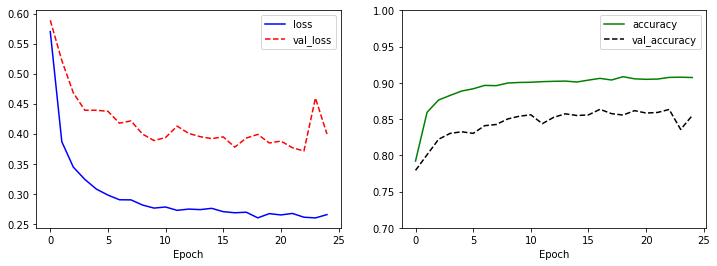

[0.21835196018218994, 0.9207000136375427]

In [15]:
# 6.16 VGGNet style 네트워크 + Image Augmentation 학습
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(input_shape=(28,28,1), kernel_size=(3,3), filters=32, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=64, padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=128, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=256, padding='valid', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=512, activation='relu'),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(units=256, activation='relu'),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(units=10, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

history = model.fit(train_X, train_Y, epochs=25, validation_split=0.25)

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

model.evaluate(test_X, test_Y, verbose=0)